In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [2]:
# Load saved datasets for convenience
X_train_ecg = np.load("saved_dataset/X_train_ecg.npy")
y_train = np.load("saved_dataset/y_train.npy", allow_pickle=True)
X_test_ecg = np.load("saved_dataset/X_test_ecg.npy")
y_test = np.load("saved_dataset/y_test.npy", allow_pickle=True)
X_train_text = np.load("saved_dataset/X_train_text.npy").tolist()
X_test_text = np.load("saved_dataset/X_test_text.npy").tolist()

def aggregate_diagnostic(y_dic):
        """
        Calculates Aggregated diagnostics.
        """
        # Load scp_statements.csv for diagnostic aggregation
        agg_df = pd.read_csv('../Datasets/ptb-xl/scp_statements.csv', index_col=0)
        agg_df = agg_df[agg_df.diagnostic == 1]
        tmp = []
        for key in y_dic.keys():
            if key in agg_df.index:
                tmp.append(agg_df.loc[key].diagnostic_class)
        return list(set(tmp))

# Load the dataset
data = pd.read_csv("../Datasets/ptb-xl/ptbxl_database.csv", index_col="ecg_id")
data.scp_codes = data.scp_codes.apply(lambda x: ast.literal_eval(x))
data['diagnostic_superclass'] = data.scp_codes.apply(aggregate_diagnostic)

# Some statistics / things worth noting in the dataset

## Shared

Some stats that are shared across the dataset for both the text and ECG signals.

1. How many of the recordings are validated by a human.

Text(0.5, 0, 'Validated by human')

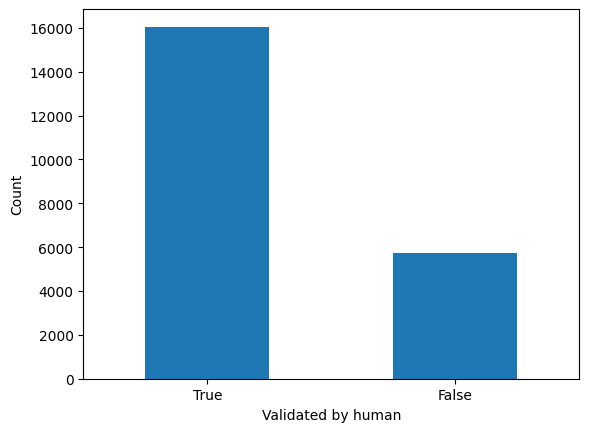

In [3]:
plot = data["validated_by_human"].value_counts().plot(kind="bar", rot=0)
plot.set_ylabel("Count")
plot.set_xlabel("Validated by human")

## Text

Analyzing the text reports will give some insights into what exclusive information might be gained from it, and how much semantic value they hold.

1. Minimum and maximum length of text reports and the average length.

In [4]:
min_length = data["report"].str.len().min()
max_length = data["report"].str.len().max()
average_length = data["report"].str.len().mean().round()
print(f"Minimum length of text reports: {min_length}")
print(f"Maximum length of text reports: {max_length}")
print(f"Average length of text reports: {average_length}")

Minimum length of text reports: 1
Maximum length of text reports: 397
Average length of text reports: 106.0


The average length of text reports for each diagostic superclass

In [5]:
norm_rows = data[data['diagnostic_superclass'].apply(lambda x: x == ['NORM'])]
mi_rows = data[data['diagnostic_superclass'].apply(lambda x: x == ['MI'])]
sttc_rows = data[data['diagnostic_superclass'].apply(lambda x: x == ['STTC'])]
cd_rows = data[data['diagnostic_superclass'].apply(lambda x: x == ['CD'])]
hyp_rows = data[data['diagnostic_superclass'].apply(lambda x: x == ['HYP'])]
multiple_values = data[data["diagnostic_superclass"].apply(lambda x: len(x) > 1)]

print(f"Number of normal reports: {len(norm_rows)}")
print(f"Number of MI reports: {len(mi_rows)}")
print(f"Number of STTC reports: {len(sttc_rows)}")
print(f"Number of CD reports: {len(cd_rows)}")
print(f"Number of HYP reports: {len(hyp_rows)}")
print(f"Number of reports with multiple values: {len(multiple_values)}")
print(f"Average length of normal reports: {norm_rows['report'].str.len().mean()}")
print(f"Average length of MI reports: {mi_rows['report'].str.len().mean()}")
print(f"Average length of STTC reports: {sttc_rows['report'].str.len().mean()}")
print(f"Average length of CD reports: {cd_rows['report'].str.len().mean()}")
print(f"Average length of HYP reports: {hyp_rows['report'].str.len().mean()}")
print(f"Average length of reports with multiple values: {multiple_values['report'].str.len().mean()}")


Number of normal reports: 9069
Number of MI reports: 2532
Number of STTC reports: 2400
Number of CD reports: 1708
Number of HYP reports: 535
Number of reports with multiple values: 5144
Average length of normal reports: 58.571617598412175
Average length of MI reports: 147.16350710900474
Average length of STTC reports: 121.69125
Average length of CD reports: 107.38817330210773
Average length of HYP reports: 109.94766355140187
Average length of reports with multiple values: 162.51477449455678


### Plotting the number of different diagnoses

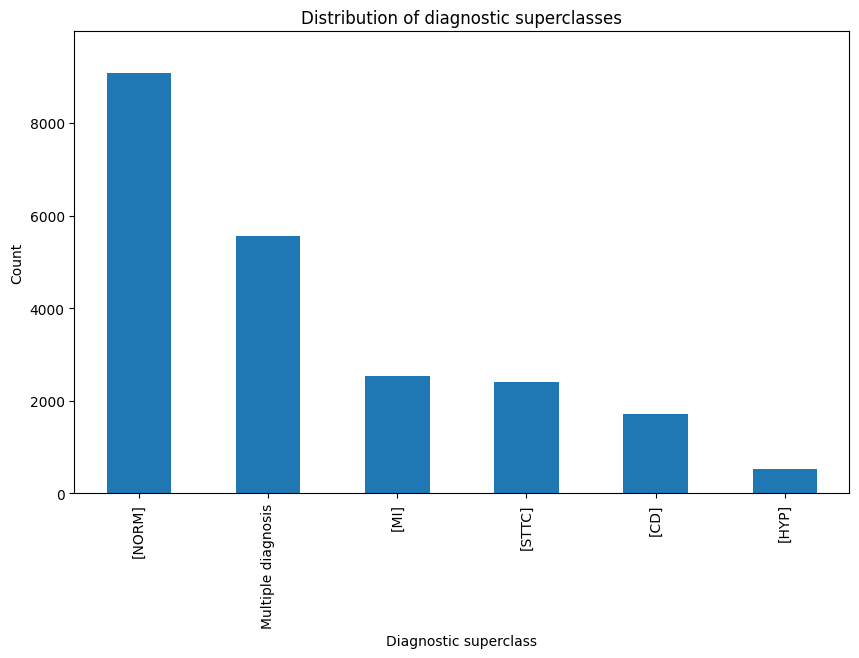

In [6]:
# Plot the distribution of diagnostic superclasses
plot = data["diagnostic_superclass"].apply(lambda x: x if len(x) == 1 else "Multiple diagnosis").value_counts().plot(kind="bar", figsize=(10, 6))
plot.set_ylabel("Count")
plot.set_xlabel("Diagnostic superclass")
plot.set_title("Distribution of diagnostic superclasses")
plt.margins(0.1)
plot.figure.savefig("../Assets/Plots/diagnostic_superclass_distribution.png", dpi=300)
plt.show()

### The number of unique reports for each diagnostic superclass

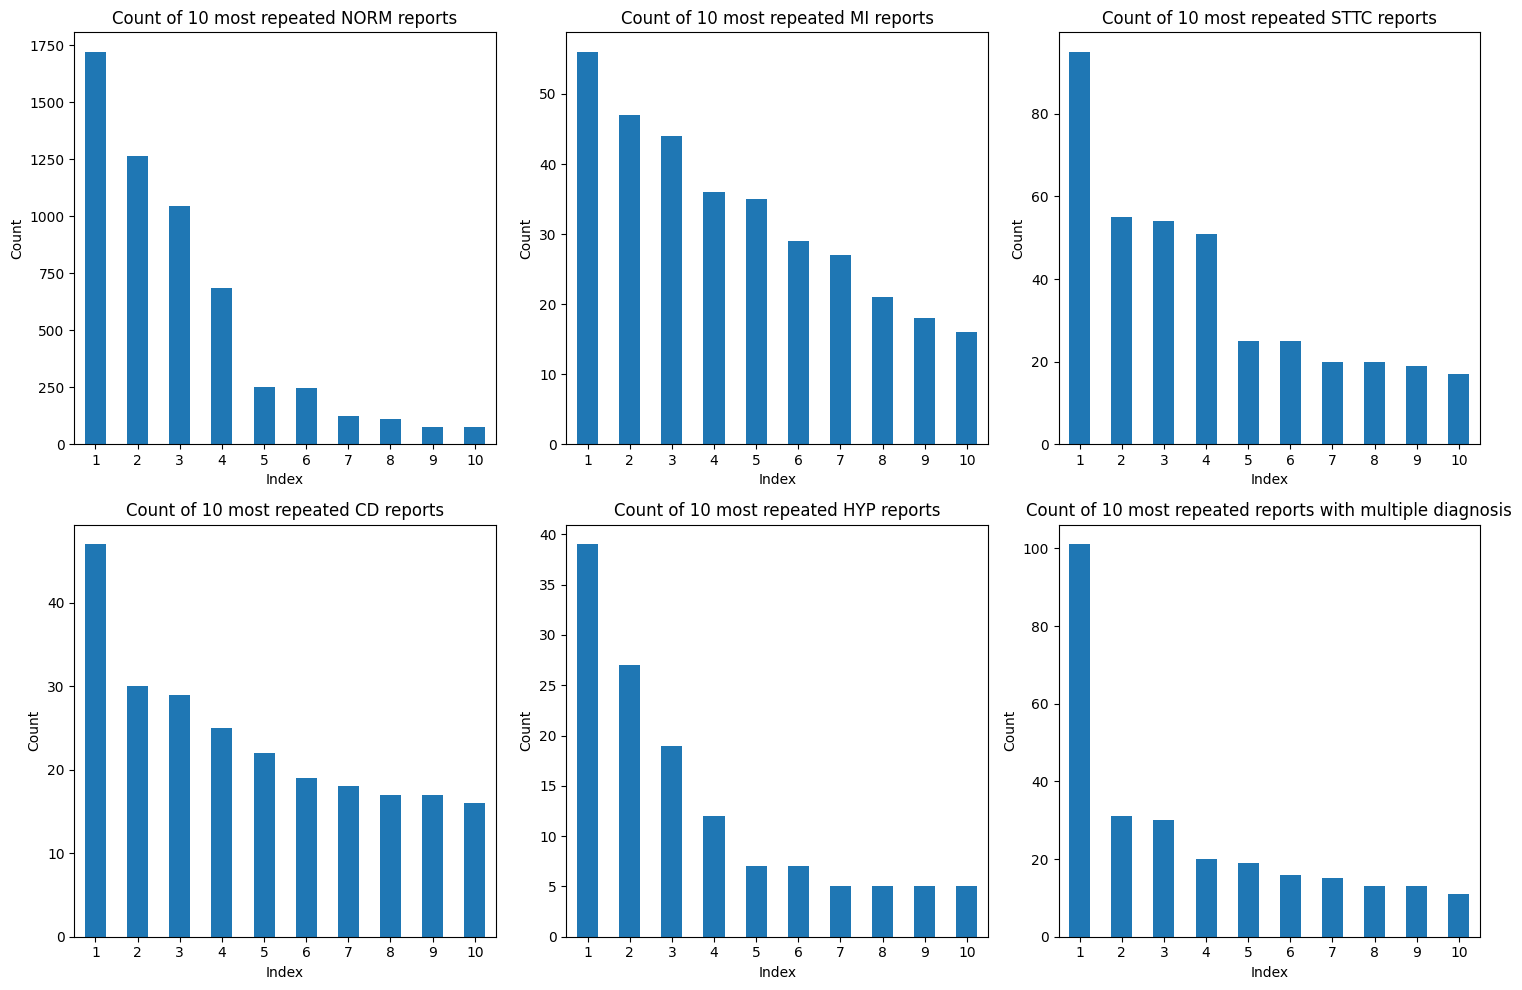

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot for norm_rows
ax1 = axes[0, 0]
norm_rows["report"].value_counts().head(10).plot(kind="bar", ax=ax1, rot=0)
ax1.set_ylabel("Count")
ax1.set_xlabel("Index")
ax1.set_title("Count of 10 most repeated NORM reports")
ax1.set_xticklabels(range(1, 11))

# Plot for mi_rows
ax2 = axes[0, 1]
mi_rows["report"].value_counts().head(10).plot(kind="bar", ax=ax2, rot=0)
ax2.set_ylabel("Count")
ax2.set_xlabel("Index")
ax2.set_title("Count of 10 most repeated MI reports")
ax2.set_xticklabels(range(1, 11))

# Plot for sttc_rows
ax3 = axes[0, 2]
sttc_rows["report"].value_counts().head(10).plot(kind="bar", ax=ax3, rot=0)
ax3.set_ylabel("Count")
ax3.set_xlabel("Index")
ax3.set_title("Count of 10 most repeated STTC reports")
ax3.set_xticklabels(range(1, 11))

# Plot for cd_rows
ax4 = axes[1, 0]
cd_rows["report"].value_counts().head(10).plot(kind="bar", ax=ax4, rot=0)
ax4.set_ylabel("Count")
ax4.set_xlabel("Index")
ax4.set_title("Count of 10 most repeated CD reports")
ax4.set_xticklabels(range(1, 11))

# Plot for hyp_rows
ax5 = axes[1, 1]
hyp_rows["report"].value_counts().head(10).plot(kind="bar", ax=ax5, rot=0)
ax5.set_ylabel("Count")
ax5.set_xlabel("Index")
ax5.set_title("Count of 10 most repeated HYP reports")
ax5.set_xticklabels(range(1, 11))

# Plot for multiple_values
ax6 = axes[1, 2]
multiple_values["report"].value_counts().head(10).plot(kind="bar", ax=ax6, rot=0)
ax6.set_ylabel("Count")
ax6.set_xlabel("Index")
ax6.set_title("Count of 10 most repeated reports with multiple diagnosis")
ax6.set_xticklabels(range(1, 11))

plt.tight_layout()
plt.savefig("../Assets/Plots/most_repeated_reports.png", dpi=300)
plt.show()


### Lengths of the reports

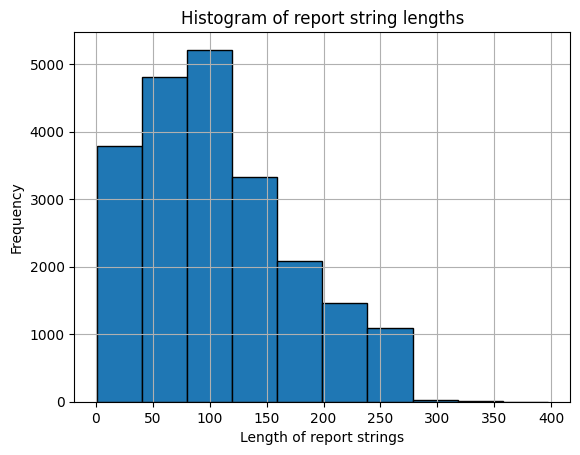

In [8]:
lengths = data["report"].str.len()

# Plot histogram
plt.hist(lengths, bins=10, edgecolor='black')
plt.xlabel('Length of report strings')
plt.ylabel('Frequency')
plt.title('Histogram of report string lengths')
plt.grid(True)
plt.show()

### Lengths of the reports for each diagnostic superclass

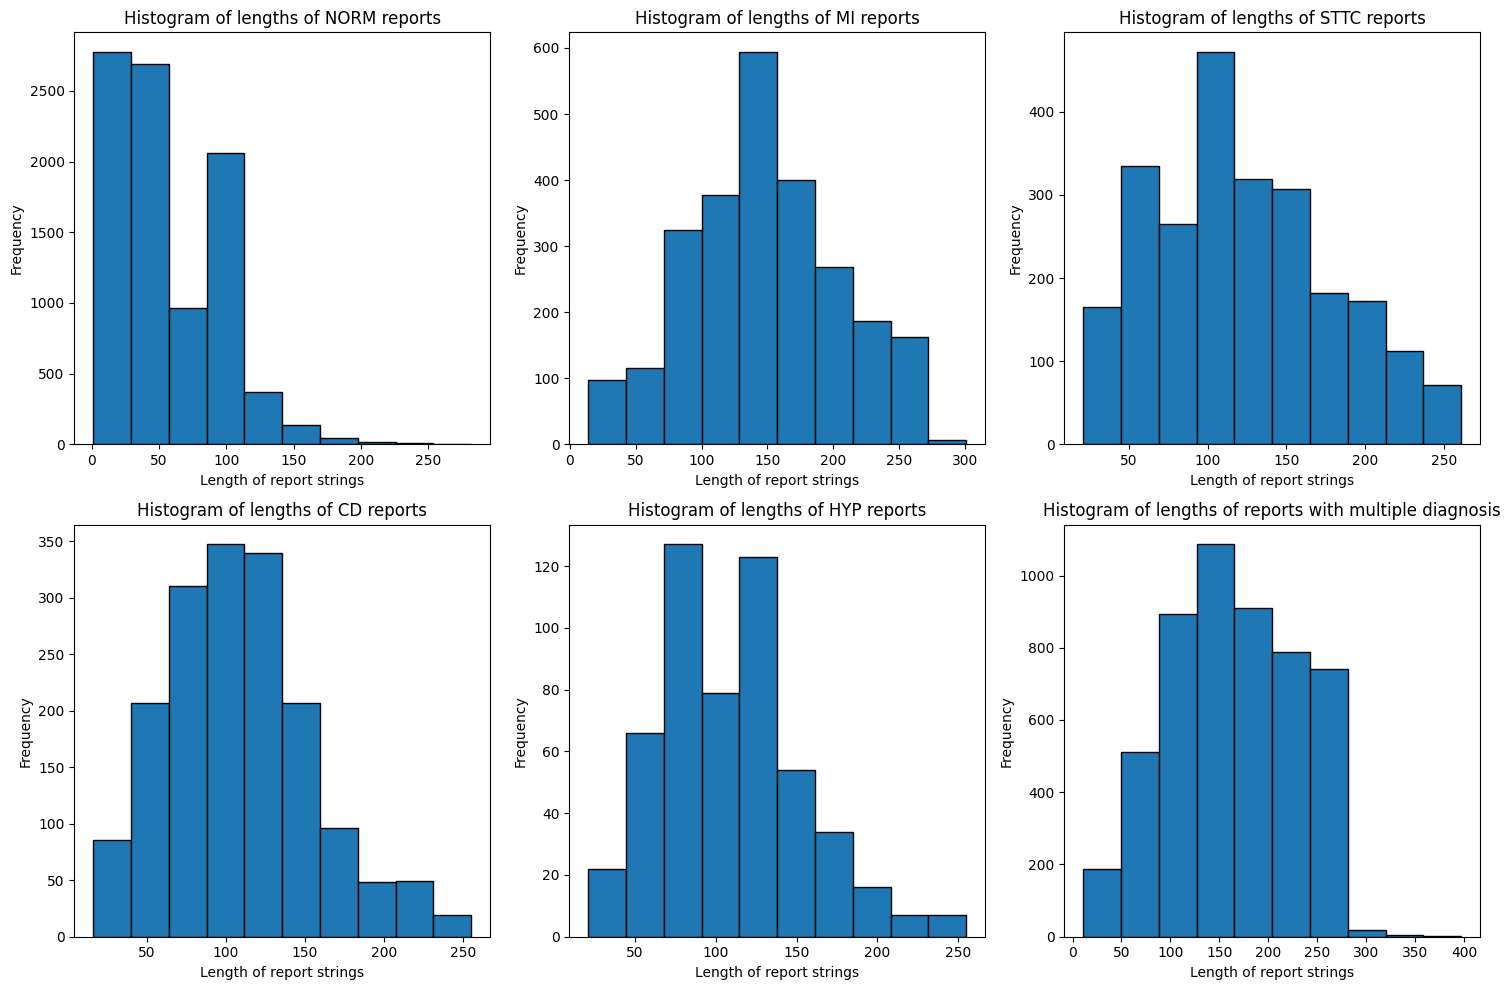

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot histograms for norm_rows
ax1 = axes[0, 0]
norm_rows["report"].str.len().plot.hist(ax=ax1, bins=10, edgecolor='black')
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Length of report strings")
ax1.set_title("Histogram of lengths of NORM reports")

# Plot histograms for mi_rows
ax2 = axes[0, 1]
mi_rows["report"].str.len().plot.hist(ax=ax2, bins=10, edgecolor='black')
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Length of report strings")
ax2.set_title("Histogram of lengths of MI reports")

# Plot histograms for sttc_rows
ax3 = axes[0, 2]
sttc_rows["report"].str.len().plot.hist(ax=ax3, bins=10, edgecolor='black')
ax3.set_ylabel("Frequency")
ax3.set_xlabel("Length of report strings")
ax3.set_title("Histogram of lengths of STTC reports")

# Plot histograms for cd_rows
ax4 = axes[1, 0]
cd_rows["report"].str.len().plot.hist(ax=ax4, bins=10, edgecolor='black')
ax4.set_ylabel("Frequency")
ax4.set_xlabel("Length of report strings")
ax4.set_title("Histogram of lengths of CD reports")

# Plot histograms for hyp_rows
ax5 = axes[1, 1]
hyp_rows["report"].str.len().plot.hist(ax=ax5, bins=10, edgecolor='black')
ax5.set_ylabel("Frequency")
ax5.set_xlabel("Length of report strings")
ax5.set_title("Histogram of lengths of HYP reports")

# Plot histograms for multiple_values
ax6 = axes[1, 2]
multiple_values["report"].str.len().plot.hist(ax=ax6, bins=10, edgecolor='black')
ax6.set_ylabel("Frequency")
ax6.set_xlabel("Length of report strings")
ax6.set_title("Histogram of lengths of reports with multiple diagnosis")

plt.tight_layout()
plt.show()


## ECG

In [72]:
from models.resnet import ResNet, ResidualBlock
import torch
resnet = ResNet(12, 5, 18, ResidualBlock)
resnet.load_state_dict(torch.load("model.pth"))
resnet.eval()

ResNet(
  (conv1): Conv1d(12, 64, kernel_size=(7,), stride=(2,), padding=(3,), bias=False)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool1d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2_x): Sequential(
    (0): ResidualBlock(
      (conv1): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
      (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
      (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
      (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [73]:
test = torch.tensor(X_test_ecg, dtype=torch.float32).permute(0, 2, 1)
test.shape

torch.Size([2198, 12, 1000])

In [74]:
print(test[600:610].shape)
y_test[600:610]

torch.Size([10, 12, 1000])


array([list(['CD']), list(['STTC']), list(['NORM']), list(['STTC']),
       list(['NORM']), list(['STTC']), list(['NORM']), list(['NORM']),
       list(['CD']), list(['NORM'])], dtype=object)

In [78]:
with torch.no_grad():
    outputs = resnet(test[20:30])

y_test[20:30]

array([list(['NORM']), list(['NORM']), list(['CD']), list(['STTC']),
       list(['MI', 'CD', 'HYP', 'STTC']), list(['STTC']), list(['CD']),
       list(['MI']), list(['CD']), list(['NORM'])], dtype=object)

In [79]:
for output in outputs:
    labels = ["CD", "HYP", "MI", "NORM", "STTC"]

    # Get the index with maximum probability
    predicted_label_index = torch.argmax(output).item()

    # Get the label corresponding to the index
    predicted_label = labels[predicted_label_index]

    # Print predicted label
    print(predicted_label)

NORM
NORM
CD
MI
CD
NORM
MI
MI
CD
NORM
